In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import data

In [41]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df['date']=pd.to_datetime(df['date'])
df.rename(columns = {'value':'Page Views', 'date':'Date'}, inplace = True)
df.set_index('Date', inplace=True)

# Cleaning the data

In [42]:
maskq1=df['Page Views']>=df['Page Views'].quantile(0.025)
maskq2=df['Page Views']<=df['Page Views'].quantile(0.975)
df = df [maskq1&maskq2]

# Draw line plot

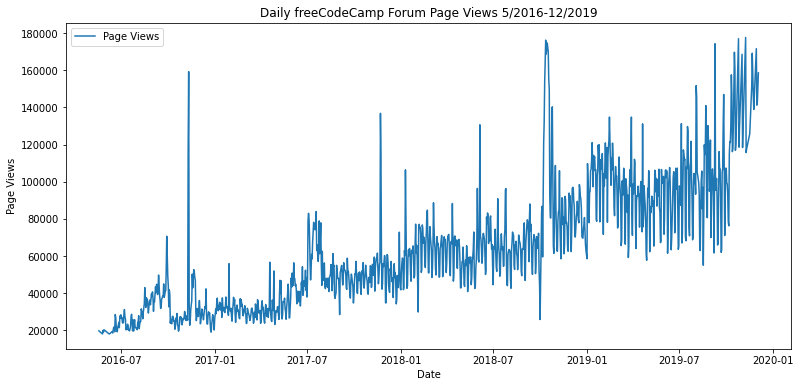

In [43]:
fig, ax = plt.subplots(figsize=(13, 6))
sns.lineplot(data=df)
ax.set(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set(xlabel='Date', ylabel='Page Views')
fig.savefig('line_plot.png')

# Draw bar plot

In [46]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar['Month'] = df_bar.index.month_name()
df_bar['Years'] = df_bar.index.year
df_bar = df_bar.groupby(['Years','Month'], sort=False).mean()
df_bar = df_bar.rename(columns={"Page Views": "Average Page Views"})
df_bar = df_bar.reset_index()

In [47]:
missing_2016 = {"Years":[2016, 2016, 2016, 2016],"Month":['January','February','March','April'],"Average Page Views":[0, 0, 0, 0]}
missing_2016 = pd.DataFrame(missing_2016)
df_bar = pd.concat([missing_2016, df_bar])

<AxesSubplot: xlabel='Years', ylabel='Average Page Views'>

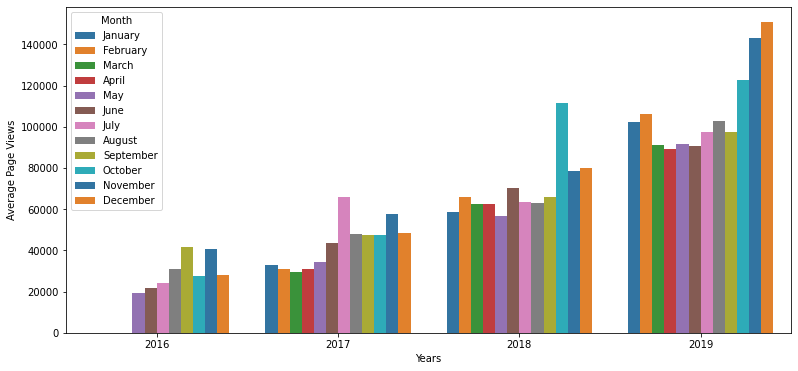

In [48]:
# Draw bar plot
fig, ax = plt.subplots(figsize=(13, 6))
sns.barplot(x='Years',y='Average Page Views', hue='Month', data=df_bar, palette="tab10")

# Draw box plot

In [49]:
# Prepare data for box plots
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['Year'] = [d.year for d in df_box.Date]
df_box['Month'] = [d.strftime('%b') for d in df_box.Date]

In [50]:
df_box.Month.unique()

array(['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan',
       'Feb', 'Mar', 'Apr'], dtype=object)

In [51]:
ord=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov', 'Dec']

<AxesSubplot: title={'center': 'Month-wise Box Plot (Seasonality)'}, xlabel='Month', ylabel='Page Views'>

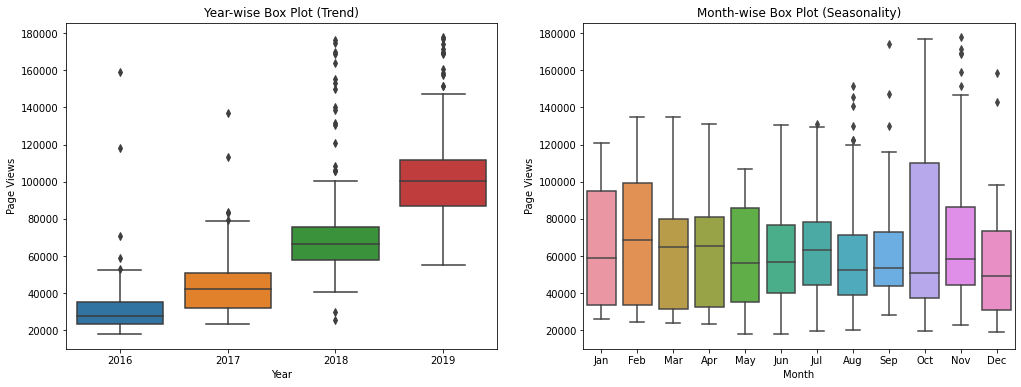

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(17, 6))
axes[0].set(title='Year-wise Box Plot (Trend)')
sns.boxplot(x='Year',y='Page Views', data=df_box, ax=axes[0])
axes[1].set(title='Month-wise Box Plot (Seasonality)')
sns.boxplot(x='Month',y='Page Views', data=df_box, order=ord, ax=axes[1])
